In [208]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt

%matplotlib inline

In [209]:
np.random.seed()

MAX_INT = 2 * 100 * 1000
n = 10 * 1000 * 1000
m = 10000

P = (1, 2, 4, 8, 16)

In [210]:
time_merge_serial = np.zeros(len(P))
time_merge = np.zeros(len(P))
time_qsort = np.zeros(len(P))

num_starts = 5

for i in range(0, len(P)):
    for j in range(0, num_starts):
        data = np.random.randint(-MAX_INT, MAX_INT, n)
        np.savetxt("initial_data.txt", data, fmt = '%d', newline = ' ', footer='\n\n', comments='')
        
        subprocess.call(["gcc", "main.c", "-o", "run", "-fopenmp"])
        subprocess.call(["./run", str(n), str(m), str(P[i])])

        with open("stats.txt") as file:
            line = file.readline()
            time_merge[i]+= float(line.split()[0])
            time_qsort[i]+= float(line.split()[1])

        data_merge = np.loadtxt("data_merge.txt", dtype='int')
        data_qsort = np.loadtxt("data_qsort.txt", dtype='int')
        
        if (not np.array_equal(data_merge, data_qsort)):
            print("Sorting doesn't work")
        
        subprocess.call(["gcc", "main_1.c", "-o", "run"])
        subprocess.call(["./run", str(n), str(m), str(P[i])])
        
        with open("stats.txt") as file:
            line = file.readline()
            time_merge_serial[i]+= float(line.split()[0])

        data_merge = np.loadtxt("data_merge.txt", dtype='int')
        data_qsort = np.loadtxt("data_qsort.txt", dtype='int')
        
        if (not np.array_equal(data_merge, data_qsort)):
            print("Sorting doesn't work")

In [211]:
time_merge_serial /= num_starts
time_merge /= num_starts
time_qsort /= num_starts
print(time_merge)
print(time_merge_serial)

[ 2.24  1.26  1.16  0.94  0.9 ]
[ 2.3   2.26  2.3   2.2   2.28]


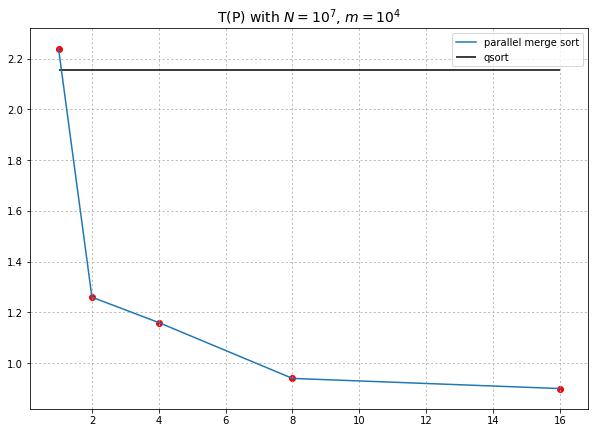

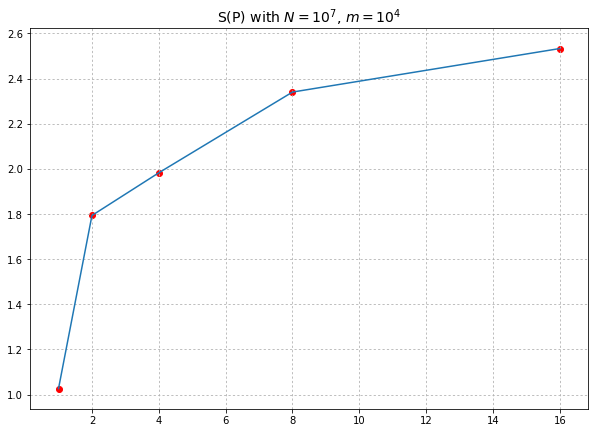

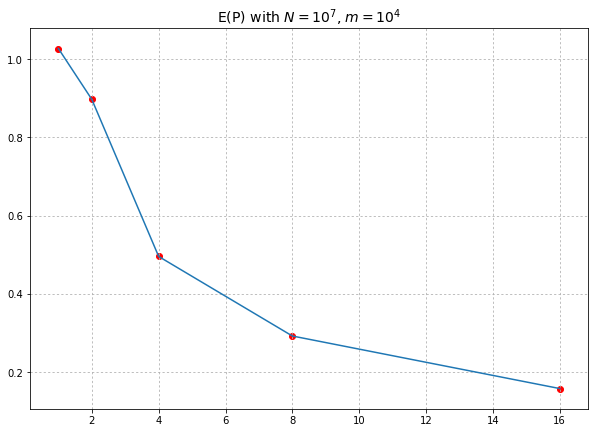

In [212]:
plt.figure(figsize=(10, 7))
plt.hlines(np.mean(time_qsort), P[0], P[-1], label='qsort')
plt.plot(P, time_merge, label='parallel merge sort')
plt.scatter(P, time_merge, marker='o', color='red')
plt.title(r'T(P) with $N = 10^7$, $m = 10^4$', size=14)
plt.legend()
plt.grid(ls=':')
plt.show()

S = time_merge_serial / time_merge

plt.figure(figsize=(10, 7))
plt.plot(P, S)
plt.scatter(P, S, marker='o', color='red')
plt.title(r'S(P) with $N = 10^7$, $m = 10^4$', size=14)
plt.grid(ls=':')
plt.show()

E = S / P

plt.figure(figsize=(10, 7))
plt.plot(P, E)
plt.scatter(P, E, marker='o', color='red')
plt.title(r'E(P) with $N = 10^7$, $m = 10^4$', size=14)
plt.grid(ls=':')
plt.show()